# **Exploratory Data Analysis Pro Kabbadi all 7 seasons data.**

* Where this results can be help full : 
  * At auction were teams bid for players.
  * To get insights of opponent teams.

* Record Holders : Created Different functions to get. functions takes N as input to return that no. of players info like (Id, Name, Score).
  * Top raiders : who scored most in raids in a match. 
  * Top defenders : who scored most in tackles in a match.
  * Top AllRounder : who scored most in both in a match.

* Players whole info. : A function that takes the player id as input and return the details like.
  * Name 
  * Total matches played (shows experience) 
  * Stats of performance in all the teams that player played for(DataFrame).
    * Team name ( from teams data file)
    * no. of matches played ( from player data file)
    * performance include successful and unsuccessful (raids and tackles)
    * Visualization of Players performance in recent N matches.

* Visualization of Teams winning to loosing ratio in all pro kabbadi seasons.

* Building a model for predicting wheather the combination of players will win or loos the match.

* Visualization of Teams performance in recent N matches.

* Visualization of comparing two Teams performance against each other in recent N matches.




<img src ='https://github.com/Jagannathpatta/HackerRank/blob/master/kabbadi.jpg' style="max-width:100%;"/>

<hr>

* got Data from: https://github.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats

# Understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Matches Dataset 
  * Containing the details of a individual match like season, teams , results, player of the match, toss, etc. 

In [2]:
matches =pd.read_csv('https://raw.githubusercontent.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats/master/DS_match.csv' , index_col='Unnamed: 0')

In [3]:
matches.head()

,match_id,match_number,date,start_time,result,player_id_of_the_match,player_name_of_the_match,series_id,series_name,status,toss_winner,toss_selection,venue_id,venue_name,home_team_id,home_team_name
0,1,Match 1,7/26/2014,20:00,U Mumba beat Jaipur Pink Panthers (45 - 31),29.0,29.0,1,"Pro Kabaddi League Season 1, 2014",Full Time,5,Choice of court : Right,5,"DOME@NSCI SVP Stadium, Mumbai",5.0,U Mumba
1,10,Match 10,7/31/2014,21:00,Bengal Warriors beat Dabang Delhi (42 - 40),12.0,12.0,1,"Pro Kabaddi League Season 1, 2014",Full Time,2,Choice of court : Left,4,"Netaji Subhash Chandra Bose Indoor Stadium, Ko...",4.0,Bengal Warriors
2,100,Match 39,8/9/2015,21:00,Dabang Delhi beat Patna Pirates (45-26),58.0,58.0,2,"Pro Kabaddi League, 2015",Full Time,6,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN
3,101,Match 40,8/10/2015,20:00,Jaipur Pink Panthers beat Dabang Delhi (51-21),NaN,NaN,2,"Pro Kabaddi League, 2015",Full Time,3,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN
4,102,Match 41,8/11/2015,20:00,Jaipur Pink Panthers beat Puneri Paltan (31-18),86.0,86.0,2,"Pro Kabaddi League, 2015",Full Time,7,Choice of court :Left,2,"Thyagaraj Sports Complex, Delhi",NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 683
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  684 non-null    int64  
 1   match_number              684 non-null    object 
 2   date                      684 non-null    object 
 3   start_time                684 non-null    object 
 4   result                    679 non-null    object 
 5   player_id_of_the_match    575 non-null    float64
 6   player_name_of_the_match  575 non-null    float64
 7   series_id                 684 non-null    int64  
 8   series_name               684 non-null    object 
 9   status                    684 non-null    object 
 10  toss_winner               684 non-null    int64  
 11  toss_selection            684 non-null    object 
 12  venue_id                  684 non-null    int64  
 13  venue_name                684 non-null    object 
 14  home_team_

* Excluding the matches were results are not available.

In [5]:
matches = matches[matches.result.notnull()]

* Checking for the total number of matches we have data for.

In [6]:
len(matches.match_id.unique())

679

* Players Dataset
  * Containing the details of a individual Player like name, points in a perticular match, stats of successful and unsuccessful raids and tackles, etc.

In [7]:
players = pd.read_csv('https://raw.githubusercontent.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats/master/DS_players.csv')

In [8]:
players.head()

,Unnamed: 0,index,player_id,player_name,player_short_name,player_skill,player_role,player_red_card,player_yellow_card,player_green_card,player_jersey,player_played,player_captain,player_on_court,player_on_starter,player_total_points,player_raid_points_total,player_raid_points_touch,player_raid_points_raid_bonus,player_tackle_points_total,player_tackle_points_touch,player_tackle_points_capture_bonus,player_raids_total,player_raids_successful,player_raids_unsuccessful,player_raids_Empty,player_tackles_total,player_tackles_successful,player_tackles_unsuccessful,match_id,team_id
0,0,0,15,Sanjay Shrestha,Sanjay Shrestha,NaN,NaN,False,False,False,88,True,False,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
1,0,0,96,Rohit Rana,Rohit Rana,NaN,NaN,False,False,False,10,True,False,True,True,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,3
2,0,0,72,Navneet Gautam,Navneet Gautam,NaN,NaN,False,False,False,9,True,True,True,True,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,3
3,0,0,52,Jasvir Singh,Jasvir Singh,NaN,NaN,False,False,False,2,True,False,False,True,12,8,7,1,4,4,1,12,7,3,2,10,3,7,1,3
4,0,0,22,Wei Yang,Wei Yang,NaN,NaN,False,False,False,20,True,False,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3


In [9]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16892 entries, 0 to 16891
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          16892 non-null  int64  
 1   index                               16892 non-null  int64  
 2   player_id                           16892 non-null  int64  
 3   player_name                         16892 non-null  object 
 4   player_short_name                   1698 non-null   object 
 5   player_skill                        0 non-null      float64
 6   player_role                         0 non-null      float64
 7   player_red_card                     16892 non-null  bool   
 8   player_yellow_card                  16892 non-null  bool   
 9   player_green_card                   16892 non-null  bool   
 10  player_jersey                       16892 non-null  int64  
 11  player_played                       16892

* Checking for total number of players we have data of.

In [10]:
len(players.player_id.unique())

895

* Randomly picked a team ID (here i.e 5) and we get all the player_ids who played for that team.

In [11]:
players[players.team_id == 5].player_id.value_counts().index

Int64Index([  29,  259,  733,   94,   54,  105,   71,  123,  324,  146,  261,
            2028,  156,    8,   34,   84,   88,  173,  145,  300,   75,  764,
             106,   42,  252,  249, 2026,   58,   96,  301,   53, 2024,  690,
             171,  117,  219,  710,  142,    1,  376,   46,  207, 2486,  322,
             689,   11,  344,  234,  694, 2313, 2334,  519,  610,  194, 2025,
             522,  226,  380, 2320,  718,  233,  172, 2656,  162,  227,  179,
             221,  229, 2345,  230,  228,  513,  367,  342],
           dtype='int64')

* Teams Dataset 
  * One of the important dataset for the analysis. Containing lots of crucial data that we will find further.

In [12]:
teams = pd.read_csv('https://raw.githubusercontent.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats/master/DS_team.csv')
team_ids = teams.id.value_counts()[:12].index      # ids of to 12 teams which participates in pro kabaddi
team_ids

Int64Index([6, 5, 1, 3, 4, 7, 8, 2, 31, 30, 29, 28], dtype='int64')

* Creating a team Catalog for users to choose a team from so they could find more details about that specific team.

In [13]:
teams_catalog = pd.DataFrame()
Id =  []
names = []
sn = []
for id in team_ids:
  Id.append(id)
  names.append(teams[teams.id == id].name.unique()[0])
  sn.append(teams[teams.id == id].short_name.unique()[0])
teams_catalog['team_id'] = Id
teams_catalog['team_name'] = names
teams_catalog['short_name'] = sn
teams_catalog.sort_values(by=['team_id'])


,team_id,team_name,short_name
2,1,Bengaluru Bulls,BEN
7,2,Dabang Delhi K.C.,DEL
3,3,Jaipur Pink Panthers,JAI
4,4,Bengal Warriors,KOL
1,5,U Mumba,MUM
0,6,Patna Pirates,PAT
5,7,Puneri Paltan,PUN
6,8,Telugu Titans,HYD
11,28,Haryana Steelers,HS
10,29,Tamil Thalaivas,TT


* player_ids we will get those players who have played for teams in teams_ids.

In [ ]:
player_ids = []
for i in team_ids:
  player_ids.extend( players[players.team_id == i].player_id.value_counts().index)


In [15]:
len(player_ids)

835

* here we came to know there might be repeated values.
* so we coverted to set to get unique ones.

In [16]:
player_ids = set(player_ids)
len(player_ids)

518

* Creating a players Catalog for users to choose a player from so they could find more details about that specific player.

In [17]:
players_catalog = pd.DataFrame()
Id =  []
names = []
for id in player_ids:
  Id.append(id)
  names.append(players[players.player_id == id].player_name.unique()[0])
players_catalog['player_id'] = Id
players_catalog['player_name'] = names
players_catalog

,player_id,player_name
0,1,Mohammad Ziaur Rahman
1,3,I Ketut Ariana
2,4,Ehsan Zamani Fard
3,5,Farhad Kamal Gharibi
4,6,Jaber Hemati Chonehkhan
...,...,...
513,2025,Ajinkya Kapre
514,2026,Siddharth Desai
515,2028,Abhishek Singh
516,2040,Anil


In [41]:
players_catalog[players_catalog.player_name == 'Rahul Chaudhari']

,player_id,player_name
64,81,Rahul Chaudhari


In [19]:
players_catalog[players_catalog.player_id == 69].player_name.values[0]

'Manjeet Chhillar'

# Top Players

* Created a fuction to get the top allround performing players.

In [20]:
def GetTopAllRounders(N = 5):
  res = []
  for index in players.groupby(['match_id' ,'player_id']).player_total_points.sum().sort_values(ascending = False).index[:N] :
    res.append( players[(players.match_id == index[0]) & (players.player_id == index[1])][['player_id','player_name','player_total_points']].values)
  print('Players with Most Points in a Match')
  return pd.DataFrame(res , columns=['[[player_id , Name , Max_Points]]'])


* The output gets us the ids, names, scores of top players.

In [21]:
GetTopAllRounders()

Players with Most Points in a Match


,"[[player_id , Name , Max_Points]]"
0,"[[197, Pardeep Narwal, 34]]"
1,"[[326, Rohit Kumar, 32]]"
2,"[[318, Pawan Sehrawat, 29]]"
3,"[[94, Rishank Devadiga, 28]]"
4,"[[197, Pardeep Narwal, 27]]"


* Created a fuction to get the top Raiders.

In [22]:
def GetTopRaiders(N = 5):
  res = []
  for index in players.groupby(['match_id' ,'player_id']).player_raid_points_total.sum().sort_values(ascending = False).index[:N] :
    res.append( players[(players.match_id == index[0]) & (players.player_id == index[1])][['player_id','player_name','player_raid_points_total']].values)
  print('Players with Most Raid Points in a Match')
  return pd.DataFrame(res , columns=['[[player_id , Name , Max_Raid_Points]]'])


In [23]:
GetTopRaiders(10)

Players with Most Raid Points in a Match


,"[[player_id , Name , Max_Raid_Points]]"
0,"[[197, Pardeep Narwal, 34]]"
1,"[[326, Rohit Kumar, 30]]"
2,"[[318, Pawan Sehrawat, 29]]"
3,"[[94, Rishank Devadiga, 28]]"
4,"[[197, Pardeep Narwal, 27]]"
5,"[[197, Pardeep Narwal, 26]]"
6,"[[197, Pardeep Narwal, 24]]"
7,"[[58, Kashiling Adake, 24]]"
8,"[[81, Rahul Chaudhari, 23]]"
9,"[[197, Pardeep Narwal, 23]]"


* There are some names comes repeatedly because that player made those records multiple times.

* To get the top defenders.

In [24]:
def GetTopDifenders(N =5):
  res = []
  for index in players.groupby(['match_id' ,'player_id']).player_tackle_points_total.sum().sort_values(ascending = False).index[:N] :
    res.append( players[(players.match_id == index[0]) & (players.player_id == index[1])][['player_id','player_name','player_tackle_points_total']].values )
  print('Players with Most Tackel Points in a Match')
  return pd.DataFrame(res , columns=['[[player_id , Name , Max_Tackel_Points]]'])

In [25]:
GetTopDifenders()

Players with Most Tackel Points in a Match


,"[[player_id , Name , Max_Tackel_Points]]"
0,"[[441, James Obilo, 13]]"
1,"[[69, Manjeet Chhillar, 11]]"
2,"[[568, Jasvir Singh, 11]]"
3,"[[146, Surender Nada, 10]]"
4,"[[769, Mahender Singh, 10]]"


# Player Details
* After getting the top players Id we can use that ID to retrive more details.
<hr>

* Info needed for player Details.

In [51]:
teams = pd.read_csv('https://raw.githubusercontent.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats/master/DS_team.csv')

In [27]:
teams[['id','name','short_name']].id.unique()

array([  3,   5,   2,   4,   6,   7,   8,   1,  28,  31,  30,  29, 238,
       242, 239, 241, 243, 240, 236, 237,   9,  11,  10,  12,  13,  21,
        18,  16,  14,  23,  22,  15,  17,  20,  19,  24,  25,  26,  27,
       167, 172, 173, 174, 181, 176])

In [28]:
df = teams[['id','name','short_name']]

In [29]:
teams = df.drop_duplicates(['id'], keep='last' )

In [30]:
teams.head()

,id,name,short_name
158,243,Haryana Heros,HARYANA
162,236,Pune Pride,PUNE
166,237,Pondicherry Predators,PONDICHERRY
167,240,Bangalore Rhinos,BANGALORE
170,238,Diler Delhi,DELHI


In [31]:
teams[teams.id == 1]

,id,name,short_name
1365,1,Bengaluru Bulls,BEN


* Creating a function to get stats of a player's performance in different teams. which takes ID as input and as an output, we get a DataFrame.

In [32]:
def teams_player_played_for(Id):

  # Below line gets us the ids of thoes teams the player played for.
  team_ids = players.groupby(['player_id','team_id']).match_id.unique().loc[Id].index
  
  # defining an empty DataFrame that will be returned.
  team_names = pd.DataFrame()

  # defining an empty list to store the no. of matches played by the player for different teams.
  team_match_counts = []

  # List of column names from players Dataset to get player's perfomance stats.
  cols = ['player_total_points','player_raid_points_total','player_tackle_points_total','player_raids_total','player_raids_successful',
          'player_raids_unsuccessful','player_raids_Empty','player_tackles_total','player_tackles_successful','player_tackles_unsuccessful'] 
  
  # defining dictionary that will contain the empty list for every col in cols.
  col_dict = {}
  for col in cols:
    col_dict[col] = []

  # Looping through team_ids
  for id in team_ids:

    # here groupby() of pandas is used.
    # getting the count i.e number of matches the player with player_id = Id has played for the team with team_id = id.
    # and appending into the team_match_counts list.
    team_match_counts.append(len(players.groupby(['player_id','team_id']).match_id.unique().loc[Id].loc[id]))

    # summing up the points and stats of player with player_id = Id has played for the team with team_id = id.
    # and appending into respective col in cols.
    for col in cols:
      col_dict[col].append(players.groupby(['player_id','team_id'])[col].sum().loc[Id].loc[id])
   
    # adding teams data (like : id, name, short_name, counts) to the empty dataframe.
    team_names = pd.concat([team_names , pd.DataFrame(teams[teams.id == id].values)])

  # naming the columns of dataframe.
  team_names.columns = ['team_id','Name','short_name']
  team_names['Matches_Played'] = team_match_counts

  # adding players stats into the DataFrame.
  for col in cols:
    team_names[col[7:]] = col_dict[col]

  # returning the DataFrame.
  return team_names

* Creating a fuction that will return full details of an individual player.

In [33]:
def Get_player_details( Id ): 
  
  # creating an empty dictionary to return results.
  details = {}

  # getting the name of the player from players_catalog.
  details['Name'] = players_catalog[players_catalog.player_id == Id].player_name.values[0]

  # getting the total no. of matches played by the player in his entire career.
  details['Total No. of matches played'] = len(players[(players.player_id == Id) & (players.player_played == True) ].match_id.unique())

  # calling the function teams_player_played_for() for getting the performace stats.
  details['Matches played for each team'] = teams_player_played_for(Id)
  
  return details


In [42]:
information = Get_player_details(81)

In [43]:
information['Name']

'Rahul Chaudhari'

In [44]:
information['Total No. of matches played']

133

In [45]:
information['Matches played for each team']

,team_id,Name,short_name,Matches_Played,total_points,raid_points_total,tackle_points_total,raids_total,raids_successful,raids_unsuccessful,raids_Empty,tackles_total,tackles_successful,tackles_unsuccessful
0,8,Telugu Titans,HYD,102,927,840,87,1729,704,323,701,301,77,224
0,12,India,IND,16,54,51,3,88,44,14,30,13,3,10
0,29,Tamil Thalaivas,TT,15,101,95,6,216,79,55,82,21,6,15


* Creating a function to get the visuals of performance in last N matches, the player played.
  * **Note: Run the cell that loads the teams data before this.**

In [ ]:
teams = pd.read_csv('https://raw.githubusercontent.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats/master/DS_team.csv')

In [52]:
def GetPerformanceStat(id , N = 5):

  # Getting a DataFrame subset with stats of a player in last N matches.
  df = players[players.player_id == id].sort_values(by=['match_id'])[['player_id','match_id','team_id','player_name','player_total_points','player_raid_points_total','player_tackle_points_total','player_raids_total','player_raids_successful','player_raids_unsuccessful','player_raids_Empty','player_tackles_total','player_tackles_successful','player_tackles_unsuccessful']][-N:]
  
  # Getting names of oposition teams in last N matches.
  op_teams = []
  for i in df[['match_id','team_id']].values:
    op_teams.append(teams[(teams.match_id == i[0]) & (teams.id != i[1])].short_name.values[0])

  # Getting name of the player.
  name = players_catalog[players_catalog.player_id == id].player_name.values[0] 

  # Total points stats
  fig1 = plt.figure(1)
  ax = fig1.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['player_total_points'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['player_raid_points_total'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['player_tackle_points_total'] , bottom= df['player_raid_points_total'] , color = 'g', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams)
  plt.legend(labels=['Total','Raids', 'tackles'])
  plt.title('Total points stats of '+name+' in last '+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Points')

  # Raids Stats
  fig2 = plt.figure(2)
  ax = fig2.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['player_raids_total'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['player_raids_successful'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['player_raids_unsuccessful'] , bottom= df['player_raids_successful'] , color = 'r', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams)
  plt.legend(labels=['Total_raids','Successful_raids', 'Unsuccessful_raids'])
  plt.title('Raids stats of '+name+' in last '+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Counts')

  # Tackel stats
  fig3 = plt.figure(3)
  ax = fig3.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['player_tackles_total'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['player_tackles_successful'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['player_tackles_unsuccessful'] , bottom= df['player_tackles_successful'] , color = 'r', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams)
  plt.legend(labels=['Total_tackles','Successful_tackles', 'Unsuccessful_tackles'])
  plt.title('Tackle stats of '+name+' in last '+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Counts')
  
  return plt.show(block =False)


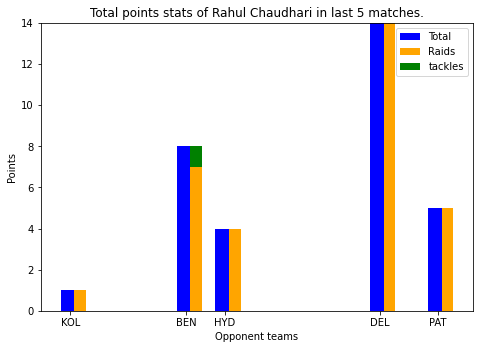

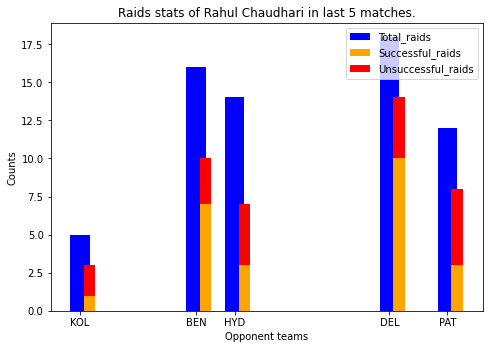

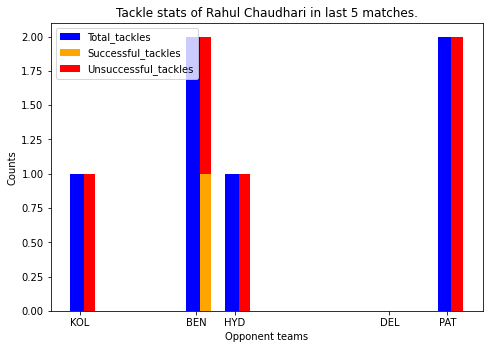

In [56]:
GetPerformanceStat(81, 5)

# Teams

* Teams Dataset 
  * Containing the details of a individual team like name, points in a perticular match, squad played in the match, stats of successful and unsuccessful raids and tackles, etc.

In [57]:
teams = pd.read_csv('https://raw.githubusercontent.com/ranganadhkodali/Pro-Kabadi-season-1-7-Stats/master/DS_team.csv')

In [58]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1368 non-null   int64  
 1   id                                        1368 non-null   int64  
 2   match_id                                  1368 non-null   int64  
 3   name                                      1368 non-null   object 
 4   score                                     1368 non-null   int64  
 5   short_name                                1368 non-null   object 
 6   squad                                     1368 non-null   object 
 7   state_of_play                             0 non-null      float64
 8   state_of_play.is_raiding_now              596 non-null    object 
 9   state_of_play.last_raid.id                596 non-null    float64
 10  state_of_play.last_raid.result      

In [59]:
teams.head()

,Unnamed: 0,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,state_of_play.last_raid.result,state_of_play.players,state_of_play.players_on_court,stats.all_outs,stats.declare,stats.points.all_out,stats.points.declare,stats.points.extras,stats.points.raid_points.raid_bonus,stats.points.raid_points.total,stats.points.raid_points.touch,stats.points.tackle_points.capture,stats.points.tackle_points.capture_bonus,stats.points.tackle_points.total,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
0,0,3,1,Jaipur Pink Panthers,28,JAI,"[{'id': 15, 'name': 'Sanjay Shrestha', 'short_...",NaN,False,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,2,0,2,0,0,3,25,22,1,0,1,28,10,20,NaN,40,10,1,NaN,24,23
1,1,5,1,U Mumba,44,MUM,"[{'id': 54, 'name': 'Jeeva Kumar', 'short_name...",NaN,False,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,4,0,4,0,0,5,28,23,12,0,12,44,15,21,NaN,40,4,10,NaN,32,22
2,0,2,10,Dabang Delhi K.C.,39,DEL,"[{'id': 4, 'name': 'Ehsan Zamani Fard', 'short...",NaN,False,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,4,0,4,0,0,5,26,21,9,0,9,39,8,24,NaN,44,12,8,NaN,27,19
3,1,4,10,Bengal Warriors,40,KOL,"[{'id': 5, 'name': 'Farhad Kamal Gharibi', 'sh...",NaN,False,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,4,0,4,0,0,6,25,19,11,0,11,40,20,16,NaN,45,9,11,NaN,32,21
4,0,2,100,Dabang Delhi,45,DEL,"[{'id': 58, 'name': 'Kashiling Adake', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,1,0,6,0,1,1,23,22,13,2,15,45,25,13,NaN,45,7,13,NaN,25,12


* The curiosity of getting to know more about Unknown column. 
*we get to know that the Unknown column indicates that the team has wins or loos.

In [ ]:
teams['Unnamed: 0'].value_counts()

1    684
0    684
Name: Unnamed: 0, dtype: int64

* ids of to 12 teams which participates in pro kabaddi.

In [ ]:
team_ids = teams.id.value_counts()[:12].index      # ids of to 12 teams which participates in pro kabaddi
team_ids

Int64Index([6, 5, 1, 3, 4, 7, 8, 2, 31, 30, 29, 28], dtype='int64')

* Looping throug team_ids and getting.
  * How many matches that team played.
  * How many they won.
  * How many they loos.

In [ ]:
for i in team_ids:
  print('Team_id :', i ,' \nTeam Name :', teams[teams.id == i].name.unique() ,'\nTotal Matches Played :', teams[teams.id == i].id.value_counts().values)
  print('1 : indicates matches won. \n0 : indicates matches loos. \n',teams[teams.id == i]['Unnamed: 0'].value_counts())
  print('-----------------------------------------------------------')

Team_id : 6  
Team Name : ['Patna Pirates'] 
Total Matches Played : [129]
1 : indicates matches won. 
0 : indicates matches loos. 
 1    66
0    63
Name: Unnamed: 0, dtype: int64
-----------------------------------------------------------
Team_id : 5  
Team Name : ['U Mumba'] 
Total Matches Played : [123]
1 : indicates matches won. 
0 : indicates matches loos. 
 0    66
1    57
Name: Unnamed: 0, dtype: int64
-----------------------------------------------------------
Team_id : 1  
Team Name : ['Bengaluru Bulls'] 
Total Matches Played : [121]
1 : indicates matches won. 
0 : indicates matches loos. 
 0    67
1    54
Name: Unnamed: 0, dtype: int64
-----------------------------------------------------------
Team_id : 3  
Team Name : ['Jaipur Pink Panthers'] 
Total Matches Played : [120]
1 : indicates matches won. 
0 : indicates matches loos. 
 0    63
1    57
Name: Unnamed: 0, dtype: int64
-----------------------------------------------------------
Team_id : 4  
Team Name : ['Bengal Warrio

* At above chell we get to know that the Unnamed 0 col is basically tells winning status of the teams.

<hr>

Creating a new dataframe that will contain the matches of pro kabbadi.
* By looping through team_ids.

In [61]:
teams_data = pd.DataFrame()

In [62]:
for i in team_ids:
  teams_data = pd.concat([teams_data , teams[teams.id == i]])

In [63]:
teams_data.rename(columns={"Unnamed: 0": "win"} , inplace=True)

In [64]:
teams_data.head()

,win,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,state_of_play.last_raid.result,state_of_play.players,state_of_play.players_on_court,stats.all_outs,stats.declare,stats.points.all_out,stats.points.declare,stats.points.extras,stats.points.raid_points.raid_bonus,stats.points.raid_points.total,stats.points.raid_points.touch,stats.points.tackle_points.capture,stats.points.tackle_points.capture_bonus,stats.points.tackle_points.total,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
5,1,6,100,Patna Pirates,26,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,3,4,16,12,6,1,7,26,15,15,NaN,44,14,6,NaN,28,22
18,0,6,1051,Patna Pirates,11,PAT,"[{'id': 197, 'name': 'Pardeep Narwal', 'short_...",NaN,True,197.0,Unsuccessful Raid,"[{'id': 388, 'is_raiding_now': False, 'on_cour...",5.0,0,0,0,0,0,1,6,5,5,0,5,11,3,3,1.0,9,3,5,0.0,7,2
23,1,6,107,Patna Pirates,34,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,1,3,21,18,9,1,10,34,25,14,NaN,47,8,9,NaN,25,16
26,0,6,109,Patna Pirates,27,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,1,2,13,11,11,0,11,27,24,13,NaN,48,11,11,NaN,26,15
29,1,6,1091,Patna Pirates,5,PAT,"[{'id': 197, 'name': 'Pardeep Narwal', 'short_...",NaN,True,197.0,Unsuccessful Raid,"[{'id': 234, 'is_raiding_now': False, 'on_cour...",7.0,0,0,0,0,2,0,2,2,1,0,1,5,0,1,0.0,3,2,1,0.0,7,6


* Cross validating that for each match_id there are two rows that shows info. for two teams those played in that match.

In [65]:
teams_data[teams_data.match_id == 1091]

,win,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,state_of_play.last_raid.result,state_of_play.players,state_of_play.players_on_court,stats.all_outs,stats.declare,stats.points.all_out,stats.points.declare,stats.points.extras,stats.points.raid_points.raid_bonus,stats.points.raid_points.total,stats.points.raid_points.touch,stats.points.tackle_points.capture,stats.points.tackle_points.capture_bonus,stats.points.tackle_points.total,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
29,1,6,1091,Patna Pirates,5,PAT,"[{'id': 197, 'name': 'Pardeep Narwal', 'short_...",NaN,True,197.0,Unsuccessful Raid,"[{'id': 234, 'is_raiding_now': False, 'on_cour...",7.0,0,0,0,0,2,0,2,2,1,0,1,5,0,1,0.0,3,2,1,0.0,7,6
28,0,30,1091,U.P. Yoddha,12,UPY,"[{'id': 2020, 'name': 'Amit', 'short_name': ''...",NaN,False,54.0,Successful Raid,"[{'id': 217, 'is_raiding_now': False, 'on_cour...",7.0,1,0,2,0,2,1,7,6,1,0,1,12,1,2,2.0,4,1,1,0.0,3,2


* After observing the output of the above cell we get to know that win col shows the incorrect representations.
  * In above teams loosing team is assigned with 0, and wining team with 1.
  * The error was corrected at the time of creating model Data.

In [66]:
teams_data.shape

(1218, 34)

In [67]:
teams.id.value_counts()[:12].sum()

1218

<hr>

### Getting data ready for model.

* Model to predict wheather combination of players will win or loos.
  * For which we need to get the squad that played containing player_ids.

In [68]:
import re
r = re.compile("'id': [0-9]+")
r1 = re.compile('[0-9]+')

def f(d):               # to get a new column containing the list of player ids.
  l = []
  for i in re.findall(r , d):
    l.append(int( re.findall(r1 , i)[0])) 

  return l
teams_data['squad_ids'] = teams_data.squad.map(f)

In [69]:
teams_data.shape

(1218, 35)

In [70]:
teams_data.head()

,win,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,state_of_play.last_raid.result,state_of_play.players,state_of_play.players_on_court,stats.all_outs,stats.declare,stats.points.all_out,stats.points.declare,stats.points.extras,stats.points.raid_points.raid_bonus,stats.points.raid_points.total,stats.points.raid_points.touch,stats.points.tackle_points.capture,stats.points.tackle_points.capture_bonus,stats.points.tackle_points.total,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful,squad_ids
5,1,6,100,Patna Pirates,26,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,3,4,16,12,6,1,7,26,15,15,NaN,44,14,6,NaN,28,22,"[142, 162, 208, 46, 92, 211, 161, 14, 20, 18, ..."
18,0,6,1051,Patna Pirates,11,PAT,"[{'id': 197, 'name': 'Pardeep Narwal', 'short_...",NaN,True,197.0,Unsuccessful Raid,"[{'id': 388, 'is_raiding_now': False, 'on_cour...",5.0,0,0,0,0,0,1,6,5,5,0,5,11,3,3,1.0,9,3,5,0.0,7,2,"[197, 123, 165, 388, 764, 790, 579, 200, 728, ..."
23,1,6,107,Patna Pirates,34,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,1,3,21,18,9,1,10,34,25,14,NaN,47,8,9,NaN,25,16,"[142, 92, 46, 162, 161, 212, 207, 14, 20, 208,..."
26,0,6,109,Patna Pirates,27,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,1,2,13,11,11,0,11,27,24,13,NaN,48,11,11,NaN,26,15,"[142, 46, 162, 161, 14, 211, 212, 20, 18, 208,..."
29,1,6,1091,Patna Pirates,5,PAT,"[{'id': 197, 'name': 'Pardeep Narwal', 'short_...",NaN,True,197.0,Unsuccessful Raid,"[{'id': 234, 'is_raiding_now': False, 'on_cour...",7.0,0,0,0,0,2,0,2,2,1,0,1,5,0,1,0.0,3,2,1,0.0,7,6,"[197, 632, 768, 390, 211, 579, 250, 234, 745, ..."


In [71]:
teams_data.columns

Index(['win', 'id', 'match_id', 'name', 'score', 'short_name', 'squad',
       'state_of_play', 'state_of_play.is_raiding_now',
       'state_of_play.last_raid.id', 'state_of_play.last_raid.result',
       'state_of_play.players', 'state_of_play.players_on_court',
       'stats.all_outs', 'stats.declare', 'stats.points.all_out',
       'stats.points.declare', 'stats.points.extras',
       'stats.points.raid_points.raid_bonus', 'stats.points.raid_points.total',
       'stats.points.raid_points.touch', 'stats.points.tackle_points.capture',
       'stats.points.tackle_points.capture_bonus',
       'stats.points.tackle_points.total', 'stats.points.total',
       'stats.raids.Empty', 'stats.raids.successful',
       'stats.raids.super_raids', 'stats.raids.total',
       'stats.raids.unsuccessful', 'stats.tackles.successful',
       'stats.tackles.super_tackles', 'stats.tackles.total',
       'stats.tackles.unsuccessful', 'squad_ids'],
      dtype='object')

* Creating a new DataFrame that contains only required data.

In [72]:
new_data = teams_data[['win', 'id', 'match_id', 'name', 'score', 'short_name','squad_ids']]

In [73]:
new_data.head()

,win,id,match_id,name,score,short_name,squad_ids
5,1,6,100,Patna Pirates,26,PAT,"[142, 162, 208, 46, 92, 211, 161, 14, 20, 18, ..."
18,0,6,1051,Patna Pirates,11,PAT,"[197, 123, 165, 388, 764, 790, 579, 200, 728, ..."
23,1,6,107,Patna Pirates,34,PAT,"[142, 92, 46, 162, 161, 212, 207, 14, 20, 208,..."
26,0,6,109,Patna Pirates,27,PAT,"[142, 46, 162, 161, 14, 211, 212, 20, 18, 208,..."
29,1,6,1091,Patna Pirates,5,PAT,"[197, 632, 768, 390, 211, 579, 250, 234, 745, ..."


* number of total matches in newdata.

In [74]:
len(new_data.match_id.unique())

609

* Correcting the error of win column.

In [75]:
new_data[new_data.match_id == 1091][['win','id','score']]

,win,id,score
29,1,6,5
28,0,30,12


In [76]:
# Looping through each matchid.
for i in new_data.match_id.unique():

  # ind variable will be assigned with 2 index values of rows that have same match_id.
  ind = new_data[new_data.match_id == i].index

  # compairing the scores at both locs and assigned 1 to the team with greater score.
  # and 0 to team less score. if the scores are same we have assigned both teams to 2.
  if new_data.loc[ind[0] ,'score'] < new_data.loc[ind[1] ,'score'] :
    new_data.loc[ind[1] ,'win'] = 1
    new_data.loc[ind[0] ,'win'] = 0

  elif new_data.loc[ind[0] ,'score'] == new_data.loc[ind[1] ,'score'] :
    new_data.loc[ind[1] ,'win'] = 2
    new_data.loc[ind[0] ,'win'] = 2

  else:
    new_data.loc[ind[1] ,'win'] = 0
    new_data.loc[ind[0] ,'win'] = 1



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


* cross validating after correcting incorrect assignments.

In [77]:
new_data[new_data.match_id == 1091][['win','id','score']]

,win,id,score
29,0,6,5
28,1,30,12


* cross validating when both teams have same score.

In [78]:
new_data[new_data.match_id == 751]

,win,id,match_id,name,score,short_name,squad_ids
1289,2,29,751,Tamil Thalaivas,40,TT,"[26, 212, 722, 111, 2325, 191, 2481, 2277, 376..."
1288,2,28,751,Haryana Steelers,40,HS,"[388, 578, 2463, 732, 2462, 2357, 366, 608, 44..."


In [79]:
new_data.win.value_counts()

1    552
0    552
2    114
Name: win, dtype: int64

* Now let's visually observe the data.

In [81]:
# Creating a dataframe that contains counts of wins, loos, and ties of each team.
df = pd.DataFrame(new_data[new_data.id == 1].win.value_counts()).T
names=[teams_catalog[teams_catalog.team_id == 1].short_name.values[0] ]
ids = [1]
total = [new_data[new_data.id == 1].shape[0]]
for id in team_ids:
  df = pd.concat([df , pd.DataFrame(new_data[new_data.id == id].win.value_counts()).T])
  ids.append(id)
  total.append( new_data[new_data.id == id].shape[0] )
  names.append( teams_catalog[teams_catalog.team_id == id].short_name.values[0])
df['total'] = total
df['name'] = names
df = df.set_index([ids])
df.drop_duplicates( inplace= True)
df.head()

,0,1,2,total,name
1,56,57,8,121,BEN
6,50,67,12,129,PAT
5,40,76,7,123,MUM
3,58,52,10,120,JAI
4,54,52,14,120,KOL


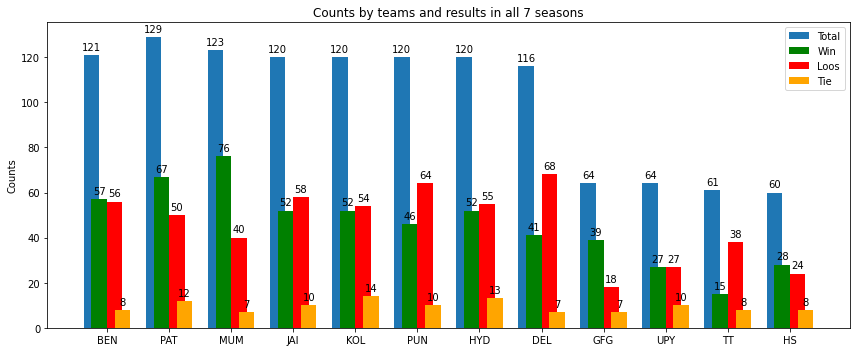

In [82]:
# Plotting bar plots using above dataFrame.
x = np.arange(len(df.name))  # the label locations
width = 0.25  # the width of the bars

fig = plt.figure(figsize=(12,5))
ax = fig.subplots()
rects1 = ax.bar(x - width, df['total'], width, label='Total')
rects2 = ax.bar(x - width/2, df[1],  width,color = 'g' , label='Win')
rects3 = ax.bar(x + width/2, df[0], width,color = 'r', label='Loos')
rects4 = ax.bar(x + width, df[2], width,color = 'orange', label='Tie')

ax.set_ylabel('Counts')
ax.set_title('Counts by teams and results in all 7 seasons')
ax.set_xticks(x)
ax.set_xticklabels(df.name)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

* Here we can see that teams (  PAT , MUM , and GFG) won more matches than loosing.
* Teams( BEN ,JAI , KOL , HYD , UPY , HS) has difference in no. of winning and loosing  matches.
* Teams( PUN , DEL , TT ) loss more matches that winning.

In [83]:
new_data.head()

,win,id,match_id,name,score,short_name,squad_ids
5,0,6,100,Patna Pirates,26,PAT,"[142, 162, 208, 46, 92, 211, 161, 14, 20, 18, ..."
18,0,6,1051,Patna Pirates,11,PAT,"[197, 123, 165, 388, 764, 790, 579, 200, 728, ..."
23,1,6,107,Patna Pirates,34,PAT,"[142, 92, 46, 162, 161, 212, 207, 14, 20, 208,..."
26,0,6,109,Patna Pirates,27,PAT,"[142, 46, 162, 161, 14, 211, 212, 20, 18, 208,..."
29,0,6,1091,Patna Pirates,5,PAT,"[197, 632, 768, 390, 211, 579, 250, 234, 745, ..."


* creating a csv file.

In [ ]:
new_data.to_csv('newData.csv')

### Creating Model Data

* Defining an empty DataFrame. with columns having all the player_ids.

In [ ]:
model_data = pd.DataFrame(columns=player_ids)

* adding the target column i.e. win from the new_data.

In [ ]:
model_data['win'] = new_data.win

In [ ]:
model_data

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,28,29,30,32,33,34,36,38,41,42,43,44,45,46,47,48,...,837,608,614,2657,2659,220,222,223,224,225,2262,2274,2277,2278,2282,2286,2290,258,2295,2296,2297,262,267,2306,2314,2315,2316,2318,2328,2357,2020,2021,2023,2024,2025,2026,2028,2040,2041,win
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


* By seeing the shape of the DataFrame were 1218 rows denotes the number of team combinations and 518 cols for 518 player_id and the last one for win col.

In [ ]:
model_data['win'][23]

1

In [ ]:
new_data['squad_ids'][23]

[142, 92, 46, 162, 161, 212, 207, 14, 20, 208, 211, 260]

In [ ]:
model_data.index

Int64Index([   5,   18,   23,   26,   29,   30,   43,   44,   51,   54,
            ...
            1145, 1179, 1191, 1194, 1220, 1225, 1239, 1246, 1269, 1288],
           dtype='int64', length=1218)

In [ ]:
# Looping through each individual row.
for i in model_data.index:
  # Looping through the player_id in a squad.
  for playerId in new_data['squad_ids'][i]:
    # assigning 1 at player_id col and index i in model_data.
    model_data.loc[i ,playerId] = 1


In [ ]:
model_data

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,28,29,30,32,33,34,36,38,41,42,43,44,45,46,47,48,...,837,608,614,2657,2659,220,222,223,224,225,2262,2274,2277,2278,2282,2286,2290,258,2295,2296,2297,262,267,2306,2314,2315,2316,2318,2328,2357,2020,2021,2023,2024,2025,2026,2028,2040,2041,win
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


* cross validating the above assignment.

In [ ]:
print(new_data['squad_ids'][5])
print(new_data['squad_ids'][26])  # player_id 14 in all these team combinations.
print(new_data['squad_ids'][29])

[142, 162, 208, 46, 92, 211, 161, 14, 20, 18, 212, 260]
[142, 46, 162, 161, 14, 211, 212, 20, 18, 208, 209, 260]
[197, 632, 768, 390, 211, 579, 250, 234, 745, 14, 384, 179]


In [ ]:
print(new_data['squad_ids'][1246])    
print(new_data['squad_ids'][1269]) # player_id 2357 in all these team combinations.
print(new_data['squad_ids'][1288])

[388, 578, 165, 732, 2462, 2357, 366, 335, 644, 608, 2463, 2328]
[2357, 578, 165, 366, 388, 2462, 732, 335, 608, 2463, 2318, 2328]
[388, 578, 2463, 732, 2462, 2357, 366, 608, 447, 165, 2328, 2337]


* filling rest of the Nan values 0.

In [ ]:
model_data = model_data.fillna(0)

In [ ]:
model_data

,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,28,29,30,32,33,34,36,38,41,42,43,44,45,46,47,48,...,837,608,614,2657,2659,220,222,223,224,225,2262,2274,2277,2278,2282,2286,2290,258,2295,2296,2297,262,267,2306,2314,2315,2316,2318,2328,2357,2020,2021,2023,2024,2025,2026,2028,2040,2041,win
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
1239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0


* Storing into a csv file.

In [ ]:
model_data.to_csv('modelData.csv')

* splitting Data into features and target

In [ ]:
features = model_data.drop(columns=['win'])
target = model_data.win

In [ ]:
print(features.shape)
print(target.size)

(1218, 518)
1218


* splitting Data into train and test Data. 

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(features, target )

### Logistic Regression

* starting with the simplest model.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(trainX,trainY)

0.7437020810514786

In [ ]:
lr.score(testX,testY)

0.4885245901639344

* conclusion : the accuracy was not at all good, but there is no much difference between the training score and testing score that's why we are not considering as overfitting of data. 

### RandomForest Classifier

* moving to advance model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( criterion='entropy')
rfc.fit(trainX , trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print('Training Score :' , rfc.score(trainX , trainY))
print('Testing Score :', rfc.score(testX ,testY))

Training Score : 0.8608981380065718
Testing Score : 0.47540983606557374


* conclusion : the accuracy was not at all good, here the difference between the training score and testing score is also so much. Data overfitting is happening here.

<hr>

# Opposition info.
<hr>

* Here we analyze the recent performance of a team.
* The function **GetTeamPerformanceStat()** will take a individual team_id and N which denotes no. of recent matches you want to analyze by default N=5.

In [260]:
def GetTeamPerformanceStat(id , N = 5):
  df = teams[teams.id == id].sort_values(by= ['match_id'])[[ 'id', 'match_id', 'name', 'score', 'short_name','stats.all_outs',  'stats.points.all_out','stats.points.extras','stats.points.raid_points.raid_bonus', 'stats.points.raid_points.total','stats.points.raid_points.touch', 'stats.points.tackle_points.capture','stats.points.tackle_points.capture_bonus','stats.points.tackle_points.total', 'stats.points.total','stats.raids.Empty', 'stats.raids.successful','stats.raids.super_raids', 'stats.raids.total','stats.raids.unsuccessful', 'stats.tackles.successful','stats.tackles.super_tackles', 'stats.tackles.total','stats.tackles.unsuccessful']][-N:]
  op_teams = []
  op_res = []
  wins= new_data[new_data.id == id].sort_values(by=['match_id'])[-N:].win.value_counts()
  name = teams_catalog[teams_catalog.team_id == id].team_name.values[0]
  for i in df[['match_id','id']].values:
    op_teams.append(new_data[(new_data.match_id == i[0]) & (new_data.id != i[1])].short_name.values[0])
    op_res.append(new_data[(new_data.match_id == i[0]) & (new_data.id != i[1])][['short_name','win']].values[0])

  # Total points stats
  fig1 = plt.figure(1)
  ax = fig1.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['stats.points.total'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['stats.points.raid_points.total'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['stats.points.tackle_points.total'] , bottom= df['stats.points.raid_points.total'] , color = 'g', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams )
  plt.legend(labels=['Total','Raids', 'tackles'])
  plt.title('Total points stats of '+ name +' in last'+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Points')
  # Pie chart
  fig4 = plt.figure( 4,figsize=(12,5),facecolor='#F2F3F4', linewidth=5,edgecolor='#04253a')
  axes = fig4.subplots(1,N)

  label = ['stats.points.raid_points.total','stats.points.tackle_points.total']
  for i, ax in enumerate(axes.flatten()):
    Raids = df[['stats.points.raid_points.total','stats.points.tackle_points.total']][i:i+1].values[0]
    ax.pie(Raids,colors=['orange','g'], autopct='%1.2f%%' , radius= 1.25)
      
    ax.set_title( op_res[i][0] + ' ' +str(op_res[i][1]))
  plt.legend(labels = label)

  
  # Raids Stats
  fig2 = plt.figure(2)
  ax = fig2.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['stats.raids.total'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['stats.raids.successful'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['stats.raids.unsuccessful'] , bottom= df['stats.raids.successful'] , color = 'r', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams)
  plt.legend(labels=['Total_raids','Successful_raids', 'Unsuccessful_raids'])
  plt.title('Raids stats of '+ name +' in last'+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Counts')
  # Pie chart
  fig5 = plt.figure(figsize=(12,5),facecolor='#F2F3F4', linewidth=5,edgecolor='#04253a')
  axes = fig5.subplots(1,N)

  label = ['stats.raids.Empty','stats.raids.successful','stats.raids.unsuccessful']
  for i, ax in enumerate(axes.flatten()):
    Raids = df[['stats.raids.Empty','stats.raids.successful','stats.raids.unsuccessful']][i:i+1].values[0]
    ax.pie(Raids, colors=['b','orange','r'],autopct='%1.2f%%' , radius= 1.25)
      
    ax.set_title(op_res[i][0] + ' ' +str(op_res[i][1]))
  plt.legend(labels = label)
  


  # Tackel stats
  fig3 = plt.figure(3)
  ax = fig3.add_axes([0,0,1,1])
  ax.bar(df.match_id.values + 0.0, df['stats.tackles.total'], color = 'b', width = 1)
  ax.bar(df.match_id.values + 0.50, df['stats.tackles.successful'], color = 'orange', width = 0.60)
  ax.bar(df.match_id.values + 0.50, df['stats.tackles.unsuccessful'] , bottom= df['stats.tackles.successful'] , color = 'r', width = 0.60)
  plt.xticks( df.match_id.values, labels=op_teams)
  plt.legend(labels=['Total_tackles','Successful_tackles', 'Unsuccessful_tackles'])
  plt.title('Tackle stats of '+ name +' in last'+ str(N) +' matches.')
  plt.xlabel('Opponent teams')
  plt.ylabel('Counts')
  # Pie chart
  fig6 = plt.figure(figsize=(12,5),facecolor='#F2F3F4', linewidth=5,edgecolor='#04253a')
  axes = fig6.subplots(1,N)

  label = ['stats.tackles.successful','stats.tackles.unsuccessful']
  for i, ax in enumerate(axes.flatten()):
    Raids = df[['stats.tackles.successful','stats.tackles.unsuccessful']][i:i+1].values[0]
    ax.pie(Raids, colors=['orange','r'], autopct='%1.2f%%'  , radius= 1.25)
      
    ax.set_title(op_res[i][0] + ' ' +str(op_res[i][1]))
  plt.legend(labels = label)
  

  return  wins ,plt.show()


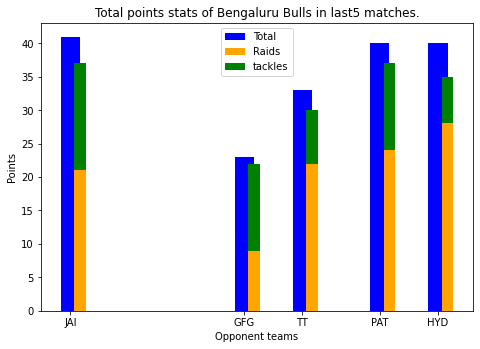

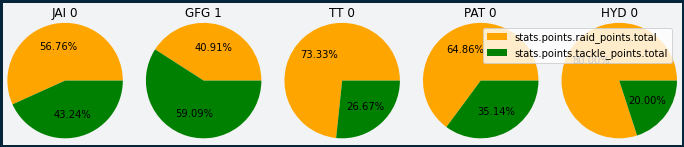

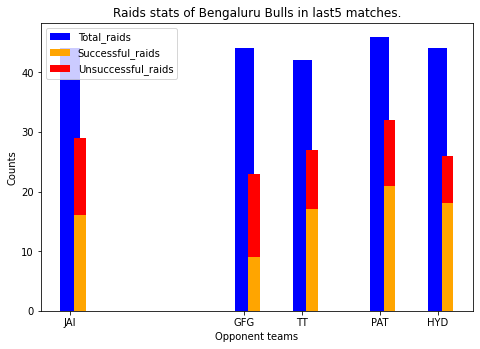

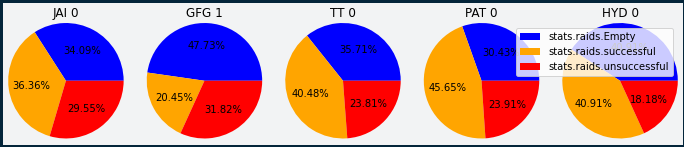

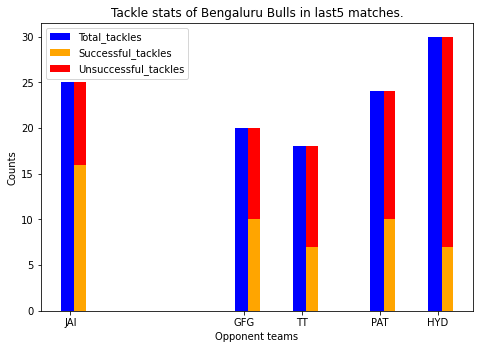

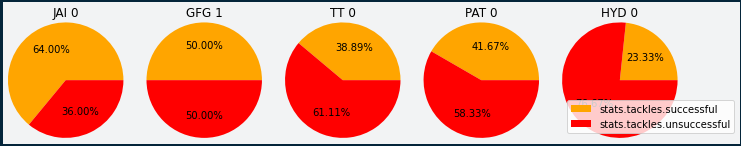

(1    4
 0    1
 Name: win, dtype: int64, None)

In [261]:
GetTeamPerformanceStat(1 , 5)  # team_id :1 is of Bengaluru Bulls team.

* From the above graphs.
* **Conclusions** : 
  * Graph 1 (bar) tells us that **team earn more score in raids** than tackles.
  * Graph 2 (pie) tells us that in 4 matches out of last 5 matches **were their raid points are more than 50% of the total score they won that match**.
  * Graph 3 (bar) tells us that the raids make **less unsuccessful raids** .i.e giving less points to oposition.
  * Graph 4 (pie) tells us that in a match out of 5 the raides attepted **more than 40% empty raids and they loosed that match**.
  * Graph 5 (bar) tells us that the defenders lossing points by attempting **more unsuccessful tackles**.
  * Graph 6 (pie) doesn't make that much scene.
  * At end we are getting the stats of our teams wins or loos in recent matches. 

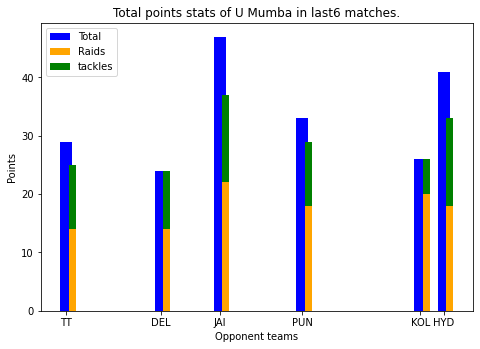

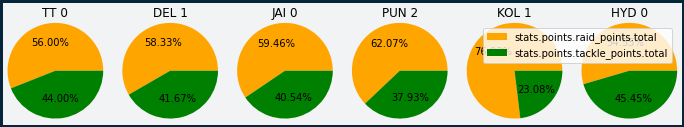

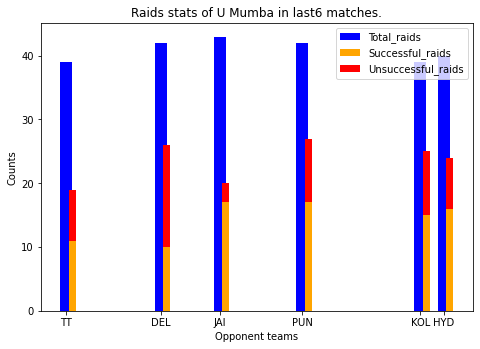

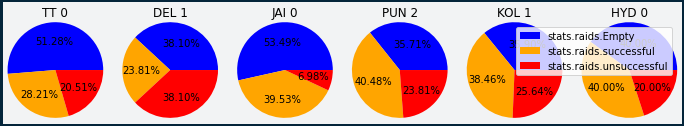

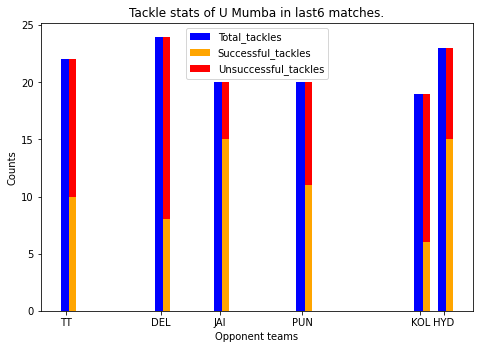

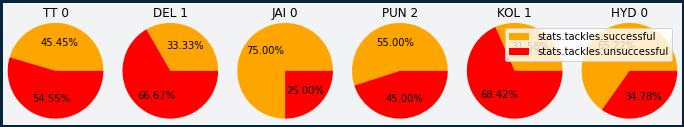

(1    3
 0    2
 2    1
 Name: win, dtype: int64, None)

In [262]:
GetTeamPerformanceStat(5 , 6)   # team_id :5 is of U Mumba team and we want to analyze recent 6 matches.

<hr>

* Creating visuals for comparing two teams on the basis of their previous matches against each other.
* The function **CompareTwoTeams()** will take two team_ids to compare and N which denotes no. of recent matches happened between them you want to analyze by default N=5.

In [265]:
def CompareTwoTeams( id1 , id2 , N = 5 ):

  # Getting all thoes matche were these teams played against each other.
  mids = pd.merge(new_data[new_data.id == id1 ],new_data[new_data.id == id2 ] , on = 'match_id').sort_values(by =['match_id']).match_id[-N:].values

  cols = [ 'id', 'match_id', 'name', 'score', 'short_name','stats.all_outs',  'stats.points.all_out','stats.points.extras','stats.points.raid_points.raid_bonus', 'stats.points.raid_points.total','stats.points.raid_points.touch', 'stats.points.tackle_points.capture','stats.points.tackle_points.capture_bonus','stats.points.tackle_points.total', 'stats.points.total','stats.raids.Empty', 'stats.raids.successful','stats.raids.super_raids', 'stats.raids.total','stats.raids.unsuccessful', 'stats.tackles.successful','stats.tackles.super_tackles', 'stats.tackles.total','stats.tackles.unsuccessful']
  df1 = pd.DataFrame(columns = cols)
  df2 = pd.DataFrame(columns = cols)
  for i in mids:
    df1 = pd.concat([ df1 , pd.DataFrame(teams[(teams.id == id1) & ( teams.match_id == i)][cols])])
    df2 = pd.concat([ df2 , pd.DataFrame(teams[(teams.id == id2) & ( teams.match_id == i)][cols])])

  # getting names og both the teams.
  t1 = teams_catalog[teams_catalog.team_id == id1].team_name.values[0]
  t2 = teams_catalog[teams_catalog.team_id == id2].team_name.values[0]

  # Plotting bar plots using above dataFrame.
  x = np.arange(len(mids))  # the label locations
  width = 0.13  # the width of the bars

  fig = plt.figure(figsize=(20,5), linewidth=5,edgecolor='#04253a')
  ax = fig.subplots( )
  rects1 = ax.bar(x - width*2.5, df1['stats.points.total'],  width,color = 'b', label='T1 :'+ t1 +' Total')
  rects2 = ax.bar(x - width*1.5, df1['stats.points.raid_points.total'],  width,color = 'orange',  label=t1 +' Raids')
  rects3 = ax.bar(x - width/2, df1['stats.points.tackle_points.total'] ,  width, color = 'r', label=t1 +' Tackles')
  rects4 = ax.bar(x + width/2, df2['stats.points.total'],  width,color = 'g', label='T2 :'+t2 +' Total')
  rects5 = ax.bar(x + width*1.5, df2['stats.points.raid_points.total'],  width,color = 'orange',  label=t2 +' Raids')
  rects6 = ax.bar(x + width*2.5, df2['stats.points.tackle_points.total'] ,  width,color = 'r', label=t2 +' Tackles')

  ax.set_ylabel('Points')
  ax.set_xlabel('Match ids')
  ax.set_title('Points by Both teams in the matches.')
  ax.set_xticks(x)
  ax.set_xticklabels(mids)
  ax.legend()


  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')
          
  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)
  autolabel(rects4)
  autolabel(rects5)
  autolabel(rects6)

  fig.tight_layout()

  # pie charts
  fig2 = plt.figure(figsize=(20,5),facecolor='#F2F3F4', linewidth=5,edgecolor='#04253a')
  axes = fig2.subplots(2,len(mids))

  label = ['stats.raids.Empty','stats.raids.successful','stats.raids.unsuccessful']
  for i, ax in enumerate(axes[0].flatten()):
    Raids = df1[['stats.raids.Empty','stats.raids.successful','stats.raids.unsuccessful']][i:i+1].values[0]
    ax.pie(Raids, colors=['b','orange','r'],autopct='%1.2f%%' , radius= 1.25)
      
    # ax.set_title(op_res[i][0] + ' ' +str(op_res[i][1]))
    ax.set_title(str(id1)+' : Match_id :'+str(mids[i]))


  for i, ax in enumerate(axes[1].flatten()):
    Raids = df2[['stats.raids.Empty','stats.raids.successful','stats.raids.unsuccessful']][i:i+1].values[0]
    ax.pie(Raids, colors=['b','orange','r'],autopct='%1.2f%%' , radius= 1.25)
      
    # ax.set_title(op_res[i][0] + ' ' +str(op_res[i][1]))
    ax.set_title(str(id2)+' : Match_id :'+str(mids[i]))

  plt.legend(labels = label)

  # pie charts
  fig3 = plt.figure(figsize=(20,5), linewidth=5,edgecolor='#04253a')
  axes = fig3.subplots(2,len(mids))

  label = ['stats.tackles.successful','stats.tackles.unsuccessful']
  for i, ax in enumerate(axes[0].flatten()):
    Tackles = df1[['stats.tackles.successful','stats.tackles.unsuccessful']][i:i+1].values[0]
    ax.pie(Tackles, colors=['orange','r'],autopct='%1.2f%%' , radius= 1.25)
      
    # ax.set_title(op_res[i][0] + ' ' +str(op_res[i][1]))
    ax.set_title(str(id1)+' : Match_id :'+str(mids[i]))


  for i, ax in enumerate(axes[1].flatten()):
    Tackles = df2[['stats.tackles.successful','stats.tackles.unsuccessful']][i:i+1].values[0]
    ax.pie(Tackles, colors=['orange','r'],autopct='%1.2f%%' , radius= 1.25)
      
    # ax.set_title(op_res[i][0] + ' ' +str(op_res[i][1]))
    ax.set_title(str(id2)+' : Match_id :'+str(mids[i]))

  plt.legend(labels = label)

  return plt.show()


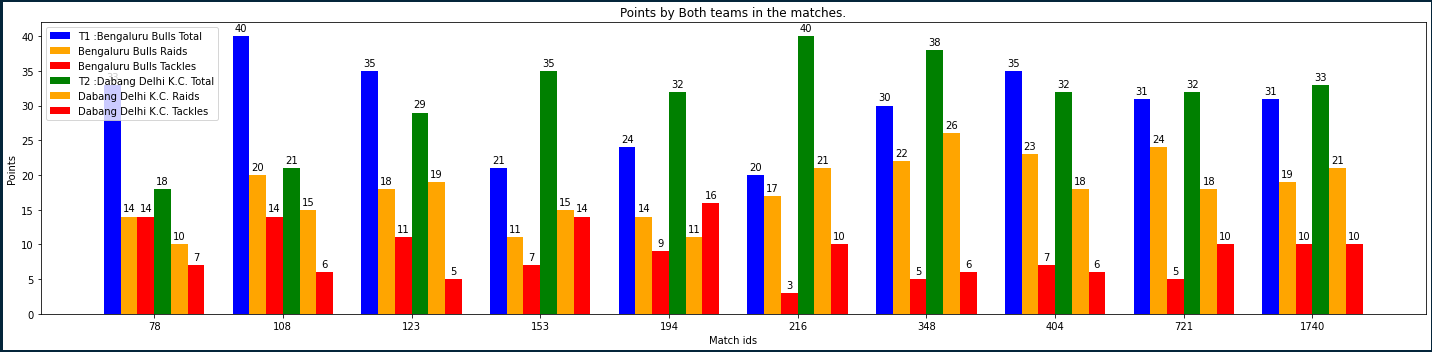

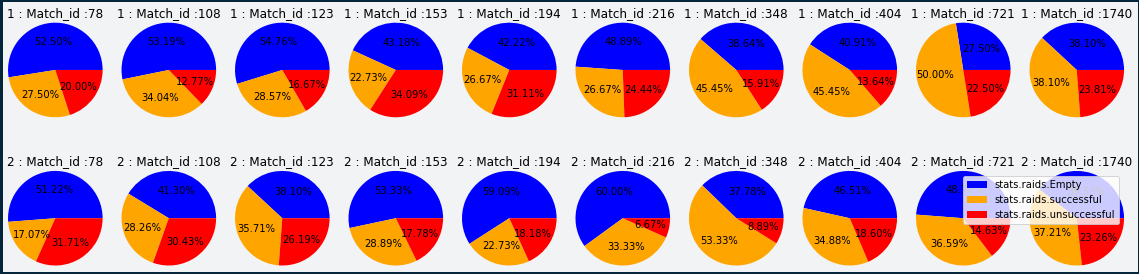

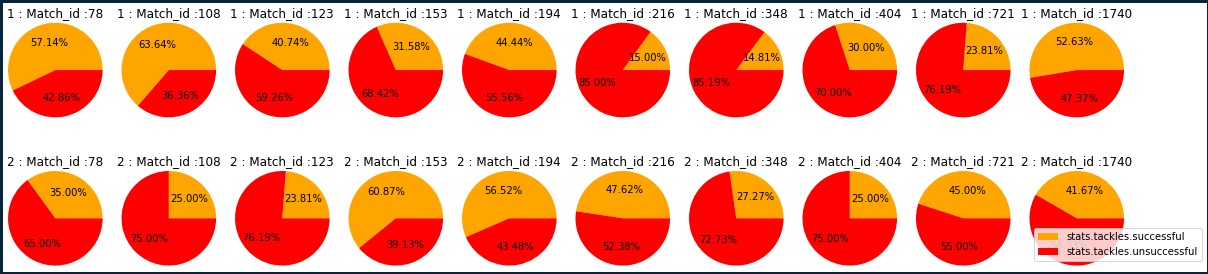

In [267]:
CompareTwoTeams( 1 , 2 , 10 )   # team_id :1 is of Bengaluru Bulls team , team_id :2 is of Dabang Delhi team and we want to analyze recent 10 matches.

* Compairing team Telugu Titans and U Mumba.

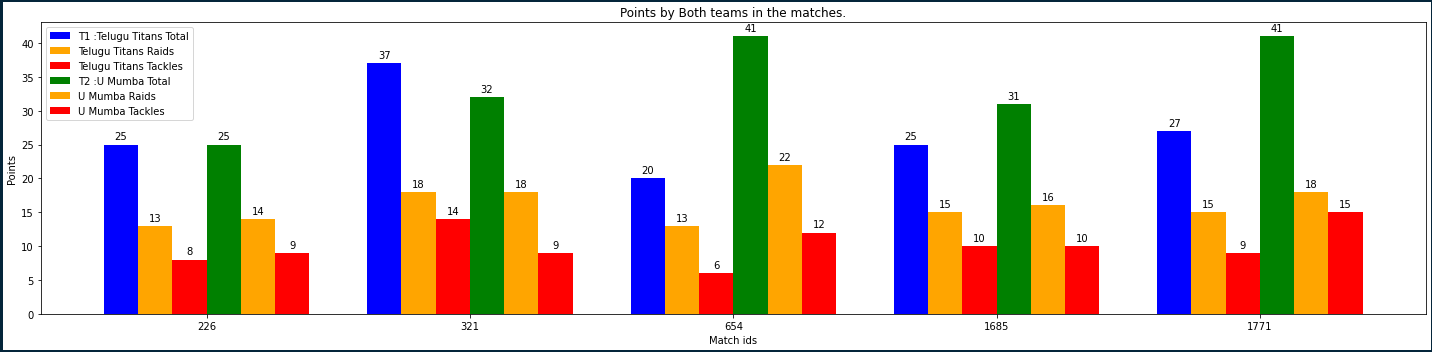

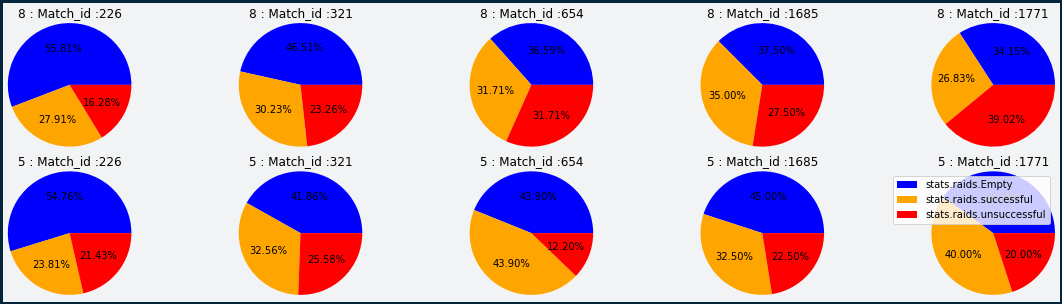

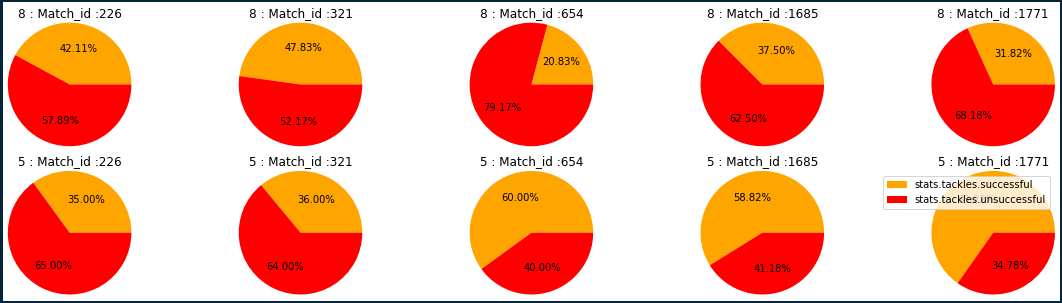

In [268]:
CompareTwoTeams( 8 , 5 )